#                                  Optimizing Deep Neural Networks



## Description
The utmost important task while developing a deep learning model is optimization.
Due to the audacity of this problem, a specialized set of optimization techniques have been developed for solving it. This unit presents these optimization techniques for neural network training. 


## Overview

- Regularization using Dropout, early stopping and other methods	
- Weight initialization variants	
- Choice of learning rate and learning rate decay
- Gradient descent with Momentum
- Optimizations - RMSprop, Adam
- Batch Normalization and its usage
- Transfer function - Relu vs Sigmoid - Cross entropy vs mse
- Specific Text Optimizations
 

## Pre-requisite

- Python
- Numpy
- scikit
- keras
- Building a simplistic deep learning model using keras
- Intution behind working of deep neural networks
- Forward and Backword propagation in neural networks

## Learning Outcomes 

After going through this unit you will be learn about various optimization techniques and algorithms such as regularization, Gradient Descent with momentum, RMSprop, Adam, Batch Normalization and others.





# Chapter 1 : Regularization using Dropout, early stopping and other methods

## What is Regularization?
Before we deep dive into the topic, take a look at this image:
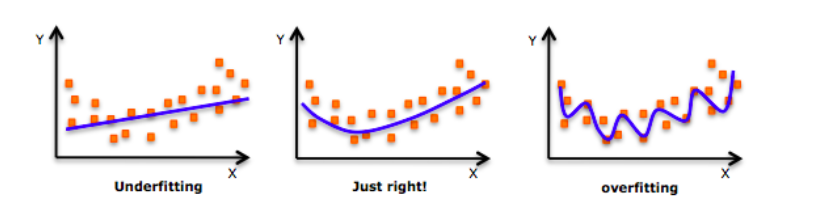
Have you seen this image before? As we move towards the right in this image, our model tries to learn too well the details and the noise from the training data, which ultimately results in poor performance on the unseen data.

In other words, while going towards the right, the complexity of the model increases such that the training error reduces but the testing error doesn’t. This is shown in the image below.
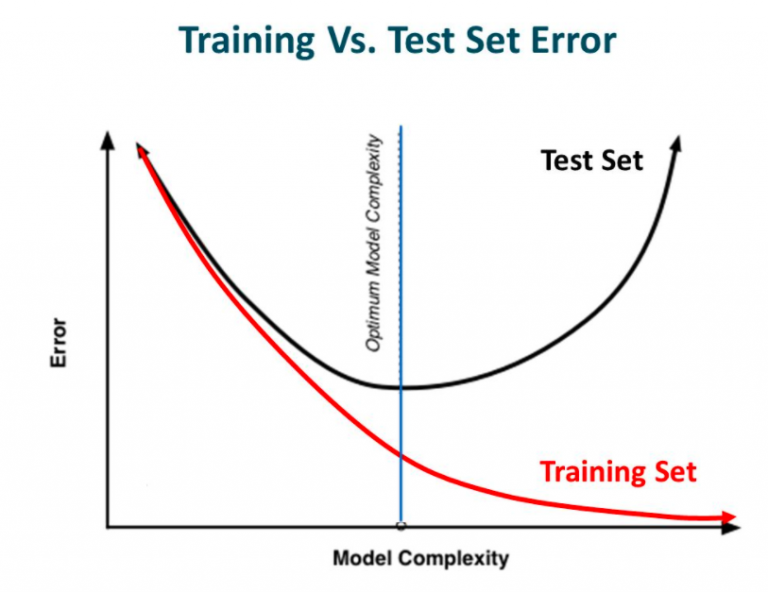

Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well.


### How does Regularization help reduce Overfitting?
Let’s consider a neural network which is overfitting on the training data as shown in the image below.
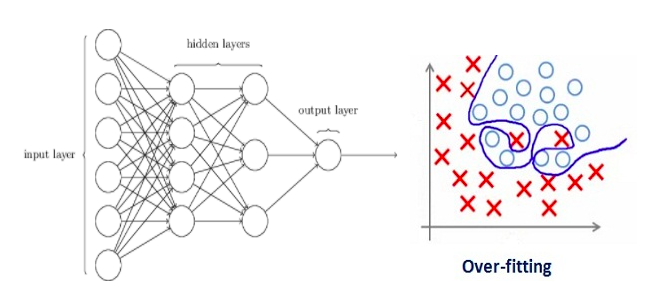
 
While applying regularization in machine learning, the cofficients are penalized. In deep learning, it actually penalizes the weight matrices of the nodes.

Assume that our regularization coefficient is so high that some of the weight matrices are nearly equal to zero.

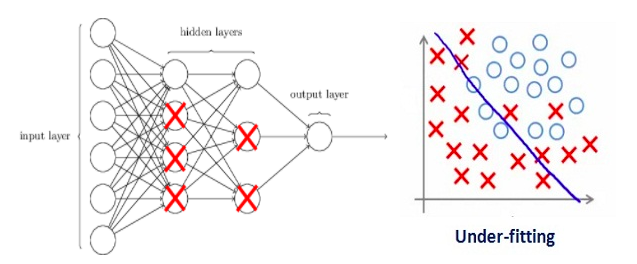


This will result in a much simpler linear network and slight underfitting of the training data.

Such a large value of the regularization coefficient is not that useful. We need to optimize the value of regularization coefficient in order to obtain a well-fitted model as shown in the image below.

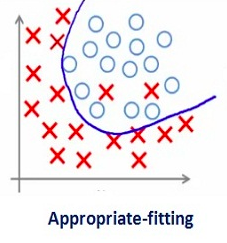

 

### Different Regularization Techniques in Deep Learning
Now that we have an understanding of how regularization helps in reducing overfitting, we’ll learn a few different techniques in order to apply regularization in deep learning.


## Dropout Regularization For Neural Networks

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

As a neural network learns, neuron weights settle into their context within the network. Weights of neurons are tuned for specific features providing some specialization. Neighboring neurons become to rely on this specialization, which if taken too far can result in a fragile model too specialized to the training data. This reliance on context for a neuron during training is referred to complex co-adaptations.

You can imagine that if neurons are randomly dropped out of the network during training, that other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.

### Dropout Regularization in Keras

Dropout is easily implemented by randomly selecting nodes to be dropped-out with a given probability (e.g. 20%) in each weight update cycle. This is how Dropout is implemented in Keras. Dropout is only used during the training of a model and is not used when evaluating the skill of the model.

Next we will explore a few different ways of using Dropout in Keras.

The examples will use the Churn Modelling. This is a binary classification problem where the objective is to correctly predict the churn probability of a customer.

The full baseline model is listed below.



## Feedback:
* Need more expalination regarding overfitting and underfitting.
* Why regularization prevent overfitting?
* drop out image and some expalination required.
https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5
* Why does Dropout work?
https://www.commonlounge.com/discussion/694fd08c36994186a48d122e511f29d5

In [1]:
## Not to be done by learner

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

dataset = pd.read_csv('Churn_Modelling.csv')

X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

labelencoder_X_1 = LabelEncoder()#creating label encoder object no. 1 to encode region name(index 1 in features)
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])#encoding region from string to just 3 no.s 0,1,2 respectively
labelencoder_X_2 = LabelEncoder()#creating label encoder object no. 2 to encode Gender name(index 2 in features)
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])#encoding Gender from string to just 2 no.s 0,1(male,female) respectively
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dropout
from keras import regularizers

classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0, nesterov=False)
classifier.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, verbose=0,epochs=100)
score = classifier.evaluate(X_test, y_test)
print("Baseline: ")
print(score[1])

c:\users\pj\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
Using TensorFlow backend.


2000/2000 [==============================] - 0s 22us/step
Baseline: 
0.86


### Using Dropout on the Visible Layer

Dropout can be applied to input neurons called the visible layer.

In the example below we add a new Dropout layer between the input (or visible layer) and the first hidden layer. The dropout rate is set to 20%, meaning one in 5 inputs will be randomly excluded from each update cycle.

It can be done by adding 
	model.add(Dropout(0.2, input_shape=(60,)))
just before the layer definition.

Additionally, as recommended in the original paper on Dropout, a constraint is imposed on the weights for each hidden layer, ensuring that the maximum norm of the weights does not exceed a value of 3. This is done by setting the kernel_constraint argument on the Dense class when constructing the layers.

The learning rate was lifted by one order of magnitude and the momentum was increase to 0.9. These increases in the learning rate were also recommended in the original Dropout paper.

Continuing on from the baseline example above, the code below exercises the same network with input dropout.

In [2]:
classifier = Sequential()
classifier.add(Dropout(0.2, input_shape=(11,))) # Learner is expected to write this line only
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0, nesterov=False)
classifier.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, verbose=0, epochs=100)
score = classifier.evaluate(X_test,y_test)
print("Dropout on visible layer:" )
print(score[1])

2000/2000 [==============================] - 0s 30us/step
Dropout on visible layer:
0.862


Running the example provides a little improvement in classification accuracy, at least on a single test run.

### Using Dropout on Hidden Layers

Dropout can be applied to hidden neurons in the body of your network model.

In the example below Dropout is applied between the input layer and the hidden layer and between the hidden layer and the output layer. Again a dropout rate of 20% is used as is a weight constraint on those layers.


In [3]:
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))
classifier.add(Dropout(0.2)) # To be done by learner
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
classifier.add(Dropout(0.2)) # To be done by Learner
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0, nesterov=False)
classifier.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, verbose=0, epochs=100)
score = classifier.evaluate(X_test,y_test)
print("Dropout on hidden layer:" )
print(score[1])

2000/2000 [==============================] - 0s 51us/step
Dropout on hidden layer:
0.853


Applying dropout in the hidden layer resulted in decrement of the accuracy.


### Tips For Using Dropout

Generally, use a small dropout value of 20%-50% of neurons with 20% providing a good starting point. A probability too low has minimal effect and a value too high results in under-learning by the network.
Use a larger network. You are likely to get better performance when dropout is used on a larger network, giving the model more of an opportunity to learn independent representations.
Use dropout on incoming (visible) as well as hidden units. Application of dropout at each layer of the network has shown good results.
Use a large learning rate with decay and a large momentum. Increase your learning rate by a factor of 10 to 100 and use a high momentum value of 0.9 or 0.99.
Constrain the size of network weights. A large learning rate can result in very large network weights. Imposing a constraint on the size of network weights such as max-norm regularization with a size of 4 or 5 has been shown to improve results.



## Neural Network Early Stopping

When training neural networks, numerous decisions need to be made regarding the settings (hyperparameters) used, in order to obtain good performance. Once such hyperparameter is the number of training epochs: that is, how many full passes of the data set (epochs) should be used? If we use too few epochs, we might underfit (i.e., not learn everything we can from the training data); if we use too many epochs, we might overfit (i.e., fit the ‘noise’ in the training data, and not the signal).

Early stopping attempts to remove the need to manually set this value. It can also be considered a type of regularization method (like L1/L2 weight decay and dropout) in that it can stop the network from overfitting.

The idea behind early stopping is relatively simple:

Split data into training and test sets
At the end of each epoch (or, every N epochs):
evaluate the network performance on the test set
if the network outperforms the previous best model: save a copy of the network at the current epoch
Take as our final model the model that has the best test set performance
This is shown graphically below:

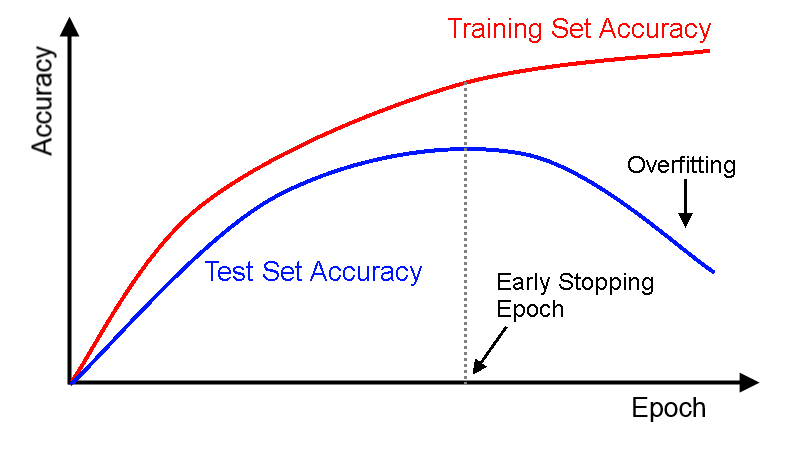

The best model is the one saved at the time of the vertical dotted line - i.e., the model with the best accuracy on the test set.


### Implementing Early Stopping in keras

In Keras, we can implement early stopping as a callback function. Callbacks are functions that can be applied at certain stages of the training process, such as at the end of each epoch. Specifically, in our solution, we included EarlyStopping(monitor='val_loss', patience=2) to define that we wanted to monitor the test (validation) loss at each epoch and after the test loss has not improved after two epochs, training is interrupted. However, since we set patience=2, we won’t get the best model, but the model two epochs after the best model. Therefore, optionally, we can include a second operation, ModelCheckpoint which saves the model to a file after every checkpoint (which can be useful in case a multi-day training session is interrupted for some reason. Helpful for us, if we set save_best_only=True then ModelCheckpoint will only save the best model.


## L2 & L1 regularization

L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term.

Cost function = Loss (say, binary cross entropy) + Regularization term

Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models. Therefore, it will also reduce overfitting to quite an extent.

However, this regularization term differs in L1 and L2.

In L2, we have:

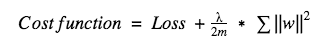

Here, lambda is the regularization parameter. It is the hyperparameter whose value is optimized for better results. L2 regularization is also known as weight decay as it forces the weights to decay towards zero (but not exactly zero).

In L1, we have:
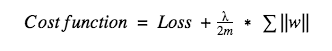

In this, we penalize the absolute value of the weights. Unlike L2, the weights may be reduced to zero here. Hence, it is very useful when we are trying to compress our model. Otherwise, we usually prefer L2 over it.

In keras, we can directly apply regularization to any layer using the regularizers.

Below is the sample code to apply L2 regularization to a Dense layer.

In [4]:
model = Sequential()
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01)))
# where 0.01 is the learning rate 

In [5]:
classifier = Sequential()
classifier.add(Dense( kernel_regularizer=regularizers.l2(0.01), activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))
classifier.add(Dense(kernel_regularizer=regularizers.l2(0.01), activation="relu", units=6, kernel_initializer="uniform"))
classifier.add(Dense(kernel_regularizer=regularizers.l2(0.01), activation="sigmoid", units=1, kernel_initializer="uniform"))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0, nesterov=False)
classifier.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, verbose=0, epochs=100)
score = classifier.evaluate(X_test,y_test)
print("L2 regularization:" )
print(score[1])

2000/2000 [==============================] - 0s 42us/step
L2 regularization:
0.7975


Note: Here the value 0.01 is the value of regularization parameter, i.e., lambda, which we need to optimize further. We can optimize it using the grid-search method.

Here we have applied l2 regularization on the baseline model and we see that it also improved upon the accuracy of the model.


# Chapter 2: Weight initialization variants



## Basics and Notations
Consider an L layer neural network, which has L-1 hidden layers and 1 output layer. The parameters (weights and biases) of the layer l are represented as
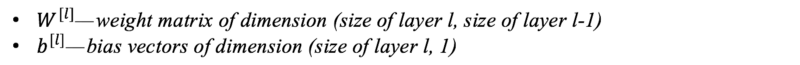

In addition to weights and biases, during the training process, following intermediate variables are computed
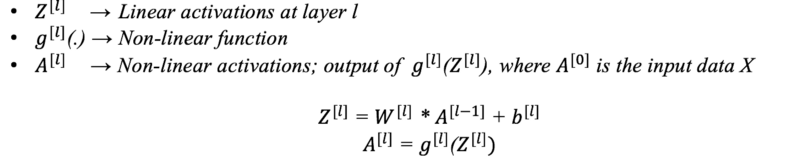

As explained earlier, Training a neural network consists of 4 steps:

#### Initialize weights and biases.
#### Forward propagation: 
Using the input X, weights W and biases b, for every layer we compute Z and A. At the final layer, we compute f(A^(L-1)) which could be a sigmoid, softmax or linear function of A^(L-1) and this gives the prediction y_hat.
#### Compute the loss function:
This is a function of the actual label y and predicted label y_hat. It captures how far off our predictions are from the actual target. Our objective is to minimize this loss function.
#### Backward Propagation: 
In this step, we calculate the gradients of the loss function f(y, y_hat) with respect to A, W, and b called dA, dW and db. Using these gradients we update the values of the parameters from the last layer to the first.
Repeat steps 2–4 for n iterations/epochs till we feel we have minimized the loss function, without overfitting the train data (more on this later!)
Here’s a quick look at steps 2 , 3 and 4 for a network with 2 layers, i.e. one hidden layer. (Note that I haven’t added the bias terms here for simplicity):

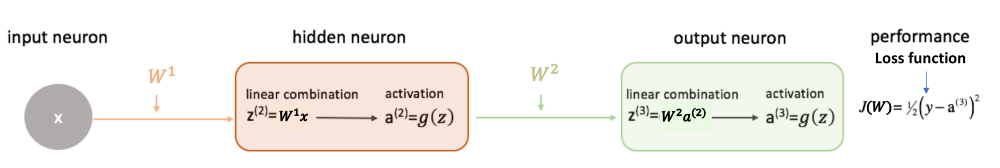

One of the starting points to take care of while building your network is to initialize your weight matrix correctly. Let us consider 2 scenarios that can cause issues while training the model:

##  Initializing all weights to 0
Let’s just put it out there — this makes your model equivalent to a linear model. When you set all weight to 0, the derivative with respect to loss function is the same for every w in W^l, thus, all the weights have the same values in the subsequent iteration. This makes the hidden units symmetric and continues for all the n iterations you run. Thus setting weights to zero makes your network no better than a linear model. It is important to note that setting biases to 0 will not create any troubles as non zero weights take care of breaking the symmetry and even if bias is 0, the values in every neuron are still different.

##  Initializing weights randomly
Initializing weights randomly, following standard normal distribution (np.random.randn(size_l, size_l-1) in Python) while working with a (deep) network can potentially lead to 2 issues — vanishing gradients or exploding gradients.

### a) Vanishing gradients 
In case of deep networks, for any activation function, abs(dW) will get smaller and smaller as we go backwards with every layer during back propagation. The earlier layers are the slowest to train in such a case.

The weight update is minor and results in slower convergence. This makes the optimization of the loss function slow. In the worst case, this may completely stop the neural network from training further.
More specifically, in case of sigmoid(z) and tanh(z), if your weights are large, then the gradient will be vanishingly small, effectively preventing the weights from changing their value. This is because abs(dW) will increase very slightly or possibly get smaller and smaller every iteration. With RELU(z) vanishing gradients are generally not a problem as the gradient is 0 for negative (and zero) inputs and 1 for positive inputs.

### b) Exploding gradients 
This is the exact opposite of vanishing gradients. Consider you have non-negative and large weights and small activations A (as can be the case for sigmoid(z)). When these weights are multiplied along the layers, they cause a large change in the cost. Thus, the gradients are also going to be large. This means that the changes in W, by W — ⍺ * dW, will be in huge steps, the downward moment will increase.

This may result in oscillating around the minima or even overshooting the optimum again and again and the model will never learn!
Another impact of exploding gradients is that huge values of the gradients may cause number overflow resulting in incorrect computations or introductions of NaN’s. This might also lead to the loss taking the value NaN.

## Best Practices

### 1.  RELU/ Leaky RELU as activation functions
Using RELU/ leaky RELU as the activation function: as it is relatively robust to the vanishing/exploding gradient issue (especially for networks that are not too deep). In the case of leaky RELU’s, they never have 0 gradient. Thus they never die and training continues.

### 2. Applying Heuristics
For deep networks, we can use a heuristic to initialize the weights depending on the non-linear activation function. Here, instead of drawing from standard normal distribution, we are drawing W from normal distribution with variance k/n, where k depends on the activation function. While these heuristics do not completely solve the exploding/vanishing gradients issue, they help mitigate it to a great extent. The most common are:

##### a) For RELU(z)
We multiply the randomly generated values of W by:

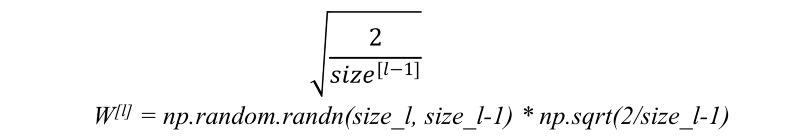

##### b) For tanh(z)
The heuristic is called Xavier initialization. It is similar to the previous one, except that k is 1 instead of 2.
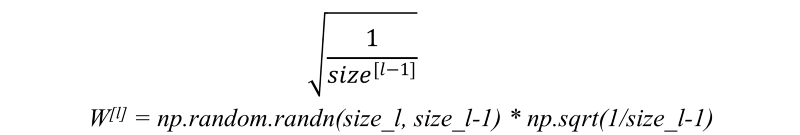

In TensorFlow W = tf.get_variable('W', [dims], initializer) where initializer = tf.contrib.layers.xavier_initializer()

##### c) Another commonly used heuristic:

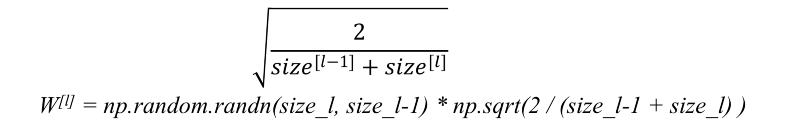
These serve as good starting points for initialization and mitigate the chances of exploding or vanishing gradients. They set the weights neither too much bigger that 1, nor too much less than 1. So, the gradients do not vanish or explode too quickly. They help avoid slow convergence, also ensuring that we do not keep oscillating off the minima. There exist other variants of the above, where the main objective again is to minimize the variance of the parameters.

### 3. Gradient Clipping 
This is another way of dealing with the exploding gradient problem. We set a threshold value, and if a chosen function of a gradient is larger than this threshold, we set it to another value. For example, normalize the gradients when the L2 norm exceeds a certain threshold –W = W * threshold / l2_norm(W) if l2_norm(W) > threshold

An important point to note is that we have talked about various initializations of W, but not the biases b. This is because the gradients with respect to bias depend only on the linear activation of that layer, and not on the gradients of the deeper layers. Thus there is no diminishing or explosion of gradients for the bias terms. As mentioned earlier, they can be safely initialized to 0.


## Feedback:
* Most of the things are repeated.

# Chapter 3: Choice of learning rate and learning rate decay

Another of the key hyperparameters to set in order to train a neural network is the learning rate for gradient descent. As a reminder, this parameter scales the magnitude of our weight updates in order to minimize the network's loss function.

If your learning rate is set too low, training will progress very slowly as you are making very tiny updates to the weights in your network. However, if your learning rate is set too high, it can cause undesirable divergent behavior in your loss function. These cases are visualized below:

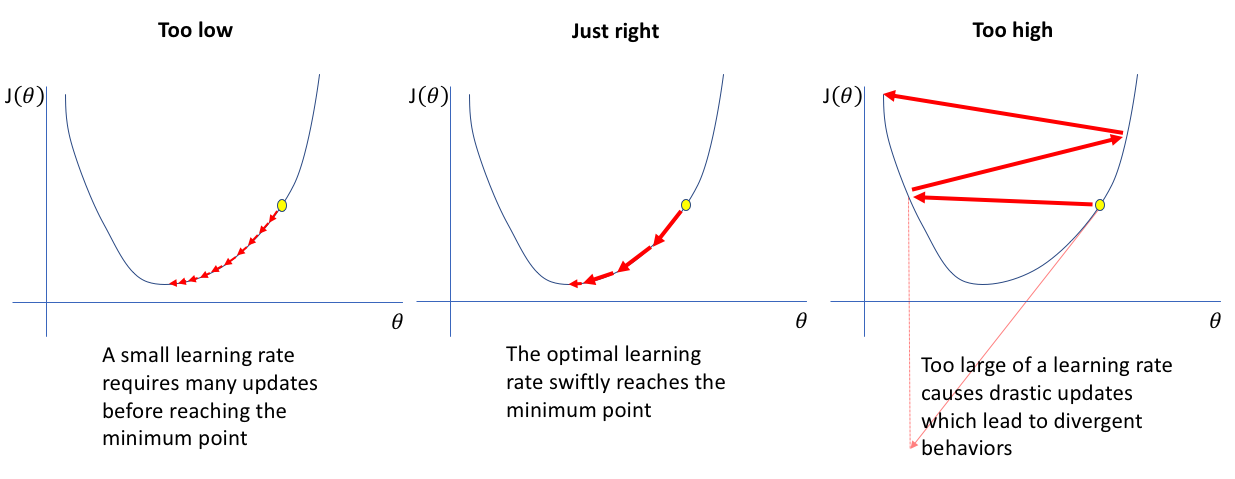

## A systematic approach towards finding the optimal learning rate
Ultimately, we'd like a learning rate which results in a steep decrease in the network's loss. We can observe this by performing a simple experiment where we gradually increase the learning rate after each mini batch, recording the loss at each increment. This gradual increase can be on either a linear or exponential scale.

For learning rates which are too low, the loss may decrease, but at a very shallow rate. When entering the optimal learning rate zone, you'll observe a quick drop in the loss function. Increasing the learning rate further will cause an increase in the loss as the parameter updates cause the loss to "bounce around" and even diverge from the minima. Remember, the best learning rate is associated with the steepest drop in loss, so we're mainly interested in analyzing the slope of the plot.

For illustrative purpose, we have used a deep neural network trained on CIFAR-10, using stochastic gradient descent (SGD) optimization algorithm with different learning rate schedules to compare the performances.


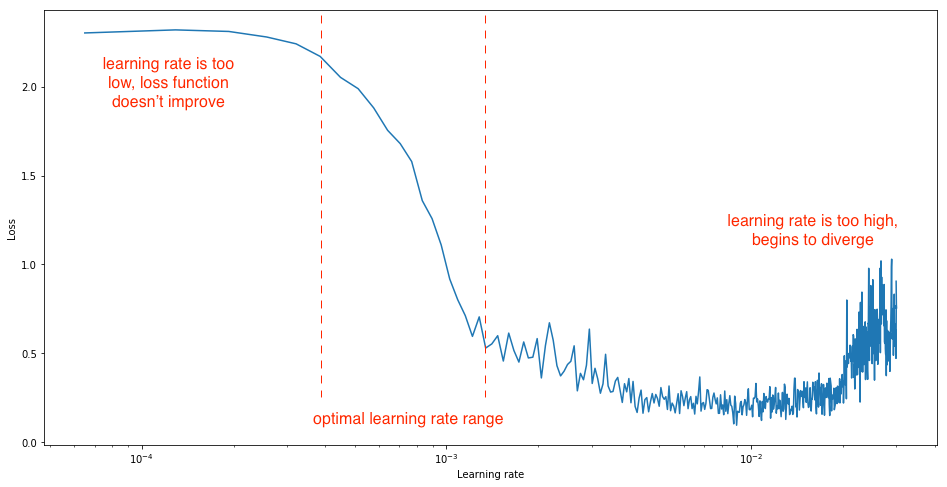

## Setting a schedule to adjust your learning rate during training

Another commonly employed technique, known as learning rate annealing, recommends starting with a relatively high learning rate and then gradually lowering the learning rate during training. The intuition behind this approach is that we'd like to traverse quickly from the initial parameters to a range of "good" parameter values but then we'd like a learning rate small enough that we can explore the deeper, but narrower parts of the loss function. In simpler terms, recall that too high of a learning rate can cause the parameter update to "jump over" the ideal minima and subsequent updates will either result in a continued noisy convergence in the general region of the minima, or in more extreme cases may result in divergence from the minima.

The most popular form of learning rate annealing is a step decay where the learning rate is reduced by some percentage after a set number of training epochs.


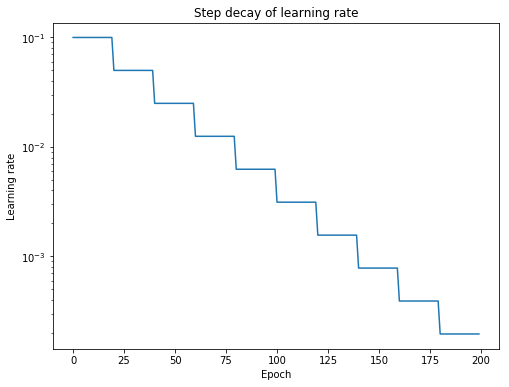
More generally, we can establish that it is useful to define a learning rate schedule in which the learning rate is updating during training according to some specified rule.


## Constant Learning Rate
Constant learning rate is the default learning rate schedule in SGD optimizer in Keras. Momentum and decay rate are both set to zero by default. It is tricky to choose the right learning rate. By experimenting with range of learning rates in our example, lr=0.1 shows a relative good performance to start with. This can serve as a baseline for us to experiment with different learning rate strategies.

keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)

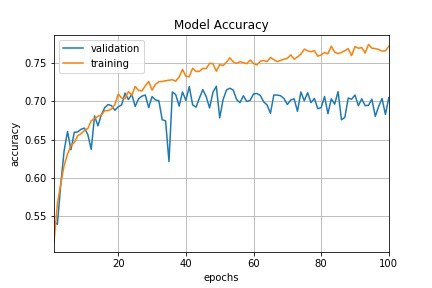

In keras we have a LearningRateScheduler entity to which we can pass custom learning rate function which takes an epoch index as input(integer, indexed from 0) and current learning rate and returns a new learning rate as output(float).

keras.callbacks.LearningRateScheduler(schedule, verbose=0)



## Time-Based Decay
The mathematical form of time-based decay is $ lr = \frac{lr0}{1+kt} $ where lr, k are hyperparameters and t is the iteration number. Looking into the source code of Keras, the SGD optimizer takes decay and lr arguments and update the learning rate by a decreasing factor in each epoch.

 $ lr *= (1. / (1. + self.decay * self.iterations)) $
Momentum is another argument in SGD optimizer which we could tweak to obtain faster convergence. Unlike classical SGD, momentum method helps the parameter vector to build up velocity in any direction with constant gradient descent so as to prevent oscillations. A typical choice of momentum is between 0.5 to 0.9.

SGD optimizer also has an argument called nesterov which is set to false by default. Nesterov momentum is a different version of the momentum method which has stronger theoretical converge guarantees for convex functions. In practice, it works slightly better than standard momentum.

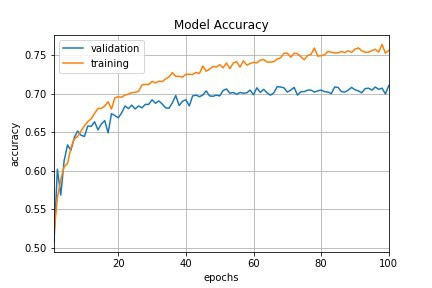

In Keras, we can implement time-based decay by setting the initial learning rate, decay rate and momentum in the SGD optimizer.


In [6]:

learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)


NameError: name 'epochs' is not defined

## Step Decay
Step decay schedule drops the learning rate by a factor every few epochs. The mathematical form of step decay is :

\begin{align}
lr = lr_{0} * drop^{ \Bigl\lfloor \frac{epoch}{epochs\_drop} \Big\rfloor}
\end{align}

A typical way is to to drop the learning rate by half every 10 epochs. To implement this in Keras, we can define a step decay function and use LearningRateScheduler callback to take the step decay function as argument and return the updated learning rates for use in SGD optimizer.
    A python function for step decay:

In [ ]:
def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate
# lrate = LearningRateScheduler(step_decay)

As a digression, a callback is a set of functions to be applied at given stages of the training procedure. We can use callbacks to get a view on internal states and statistics of the model during training. In our example, we create a custom callback by extending the base class keras.callbacks.Callback to record loss history and learning rate during the training procedure.



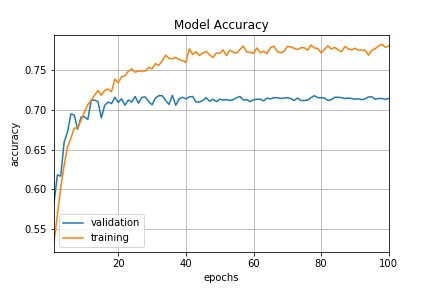
Fig 3a : Step Decay Schedule


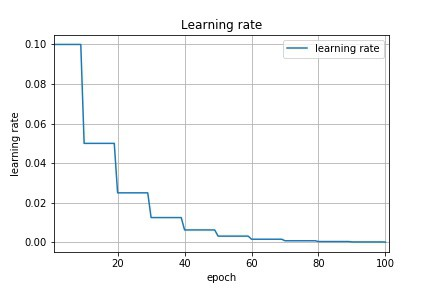
Fig 3b : Step Decay Schedule


## Exponential Decay
Another common schedule is exponential decay. It has the mathematical form 
\begin{align}
lr = lr_{0} \times e^{−kt}
\end{align}
, where lr, k are hyperparameters and t is the iteration number. Similarly, we can implement this by defining exponential decay function and pass it to LearningRateScheduler. In fact, any custom decay schedule can be implemented in Keras using this approach. The only difference is to define a different custom decay function.

A python function for exponential decay:

In [ ]:
def exp_decay(epoch):
   initial_lrate = 0.1
   k = 0.1
   lrate = initial_lrate * exp(-k*t)
   return lrate
# lrate = LearningRateScheduler(exp_decay)

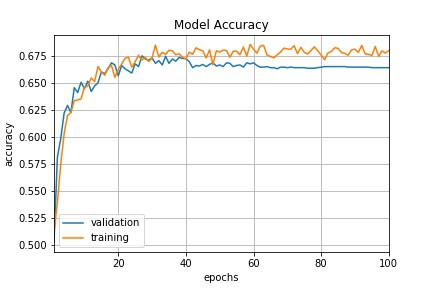
Fig 4a : Exponential Decay Schedule
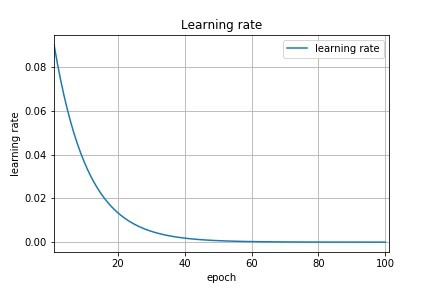
Fig 4b : Exponential Decay Schedule

Let us now compare the model accuracy using different learning rate schedules in our example.

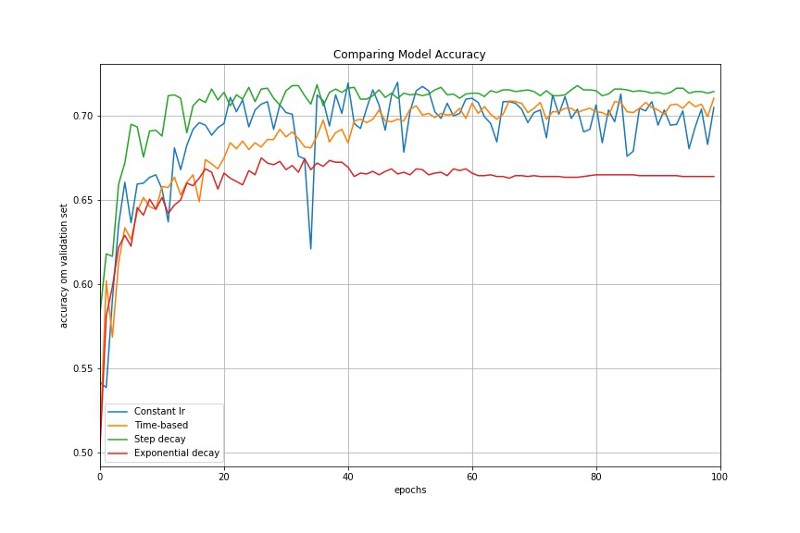
Fig 5 : Comparing Performances of Different Learning Rate Schedules


# Chapter 4: Gradient descent with Momentum

This chapter is about simple addition to classic SGD algorithm, called momentum which almost always works better and faster than Stochastic Gradient Descent. Momentum or SGD with momentum is method which helps accelerate gradients vectors in the right directions, thus leading to faster converging. It is one of the most popular optimization algorithms and many state-of-the-art models are trained using it. Before jumping over to the update equations of the algorithm, let’s look at some math that underlies the work of momentum.

## Exponentially weighed averages
Exponentially weighed averages deal with sequences of numbers. Suppose, we have some sequence S which is noisy. For this example we have a cosine function with some Gaussian noise added. It looks like this:
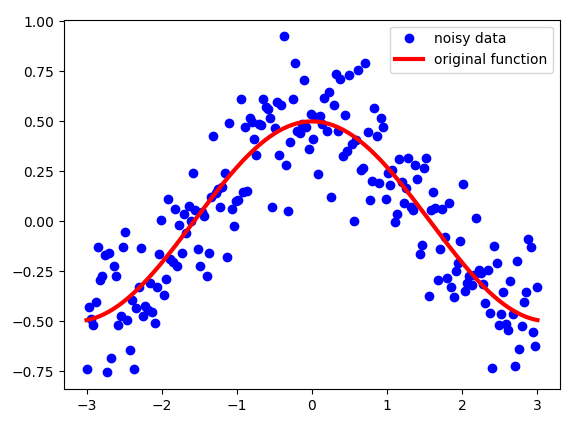


Note, that even though these dots seem very close to each over, none of them share x coordinate. It is a unique number for each point. That’s the number the defines the index of each point in our sequence S.

What we want to do with this data is, instead of using it, we want some kind of ‘moving’ average which would ‘denoise’ the data and bring it closer to the original function. Exponentially weighed averages can give us a pictures which looks like this:

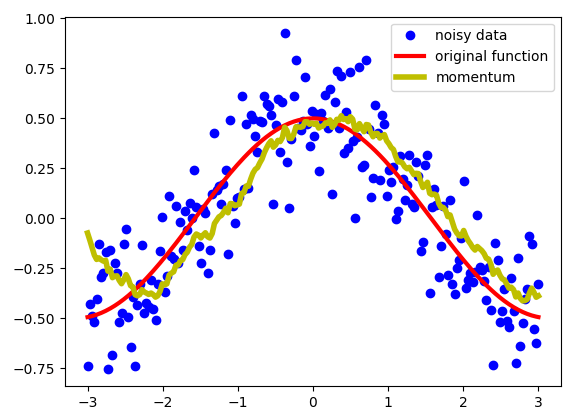

As you can see, that’s a pretty good result. Instead of having data with a lot of noise, we got much smoother line, which is closer to the original function than data we had. Exponentially weighed averages define a new sequence V with the following equation:
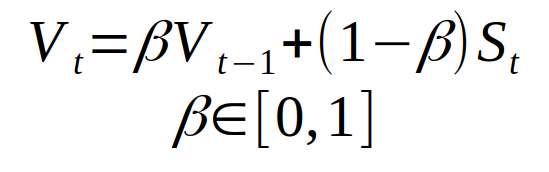

That sequence V is the one plotted yellow above. Beta is another hyper-parameter which takes values from 0 to one. beta = 0.9 has been used above. It is a good value and most often used in SGD with momentum. Intuitively, beta can be thought of as follows. We’re approximately averaging over last 1 / (1- beta) points of sequence. Let’s see how the choice of beta affects our new sequence V.

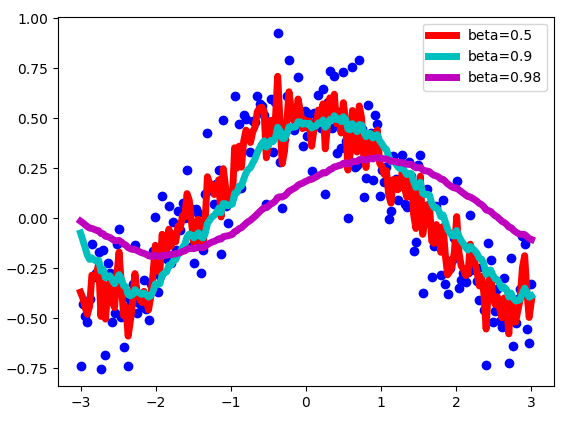

As you can see, with smaller numbers of beta, the new sequence turns out to be fluctuating a lot, because we’re averaging over smaller number of examples and therefore are ‘closer’ to the noisy data. With bigger values of beta, like beta=0.98, we get much smother curve, but it’s a little bit shifted to the right, because we average over larger number of example(around 50 for beta=0.98). Beta = 0.9 provides a good balance between these two extremes.

### Math behind the curtain
This section isn’t necessary to use momentum in your projects, so feel free to skip it. But it provides a little bit more intuition of how momentum works.

Let’s expand our definition of exponentially weighed averages for three consecutive elements of the new sequence V.
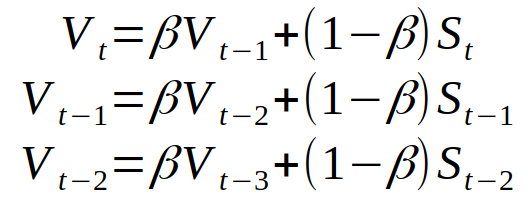

V — New sequence. S — original sequence.

Combining all of them together we get:
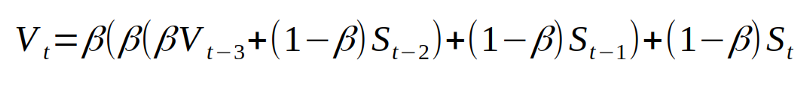

And then simplifying it a bit:
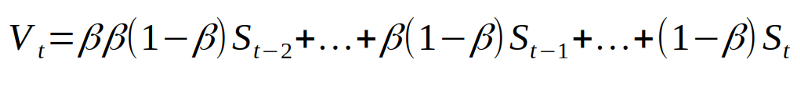

From this equation we see, that the value of Tth number of the new sequence is dependent on all the previous values 1..t of the original sequence S. All of the values from S are assigned some weight. This weight is beta to power of i multiplied by (1- beta) for (t - i)th value of S. Because beta is less than 1, it becomes even smaller when we take beta to the power of some positive number. So the older values of S get much smaller weight and therefore contribute less for overall value of the current point of V. At some point the weight is going to be so small that we can almost say that we ‘forget’ that value because its contribution becomes too small to notice. A good value to use for this approximation is when weight becomes smaller than 1 / e.  The following graph shows how fast weights get smaller with older values of S compared to threshold = 1 / e, where we mostly ‘forget’ values that are older.

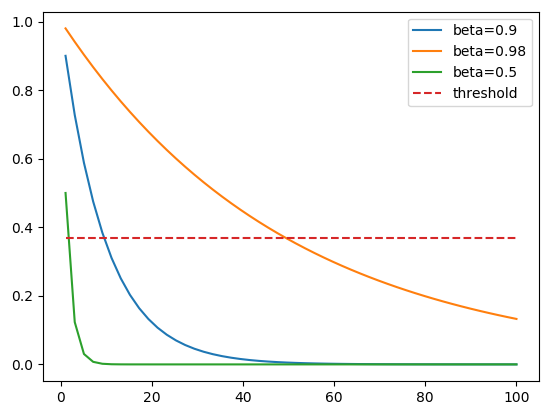

The last thing to notice is that the first couple of iterations will provide a pretty bad averages because we don’t have enough values yet to average over. The solution is instead of using V, we can use what’s called bias-corrected version of V.
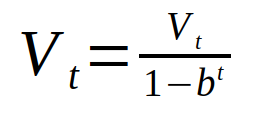

where b = beta. With large values of t, b to the power of t will be indistinguishable from zero, thus not changing our values of V at all. But for small values of t, this equation will produce a little bit better results. With momentum, people usually don’t bother to implement this part, because learning stabilizes pretty fast.

## SGD with momentum
We’ve defined a way to get ‘moving’ average of some sequence, which changes alongside with data. How can we apply this for training neural networks ? We can average over our gradients. 


Mathematically momentum can be exponential average over the gradient,  which is a moving average of our gradients. We then use it to update the weight of the network. This could written as follows:
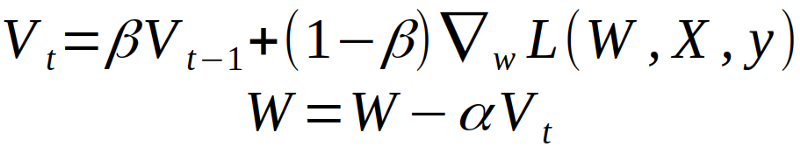

## Why momentum works
In this section we discuss about why momentum most of the times will be better than classic SGD.

With Stochastic Gradient Descent we don’t compute the exact derivate of our loss function. Instead, we’re estimating it on a small batch. Which means we’re not always going in the optimal direction, because our derivatives are ‘noisy’. Just like in my graphs above. So, exponentially weighed averages can provide us a better estimate which is closer to the actual derivate than our noisy calculations. This is one reason why momentum might work better than classic SGD.

The other reason lies in ravines. Ravine is an area, where the surface curves much more steeply in one dimension than in another. Ravines are common near local minimas in deep learning and SGD has troubles navigating them. SGD will tend to oscillate across the narrow ravine since the negative gradient will point down one of the steep sides rather than along the ravine towards the optimum. Momentum helps accelerate gradients in the right direction. This is expressed in the following pictures:
Normal SGD:
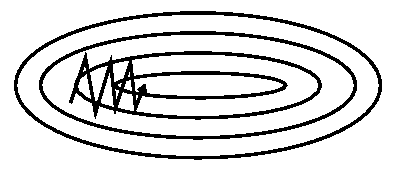

SGD with momentum:
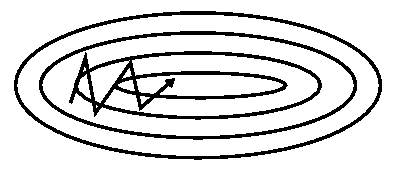


Now the code!
Here we apply momentum in the baseline model developed in the first chapter and see the effect:

In keras we can add momentum to our model by giving non zero momentum parameter when we define SGD entity.
e.g. 
for adding momentum to sgd with beta =0.9 :
sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)


In [7]:
classifier = Sequential()
classifier.add(Dropout(0.2, input_shape=(11,)))
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
classifier.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, verbose=0, epochs=100)
score = classifier.evaluate(X_test,y_test)
print("SGD with momentum:" )
print(score[1])

2000/2000 [==============================] - 0s 45us/step
SGD with momentum:
0.8585


# Chapter 5: Optimization Algorithms - RMSprop, Adam
Until now, we've always used Gradient Descent to update the parameters and minimize the cost. In this chapter, you will learn more advanced optimization methods that can speed up learning and perhaps even get you to a better final value for the cost function. Having a good optimization algorithm can be the difference between waiting days vs. just a few hours to get a good result.


## Root Mean Square Prop (RMSprop)

Root mean square prop or RMSprop is using the same concept of the exponentially weighted average of the gradients like gradient descent with momentum but the difference is the update of parameters.


### How does it work?

Consider an example where we are trying to optimize a cost function which has contours like below and the red dot denotes the position of the local optima (minimum).

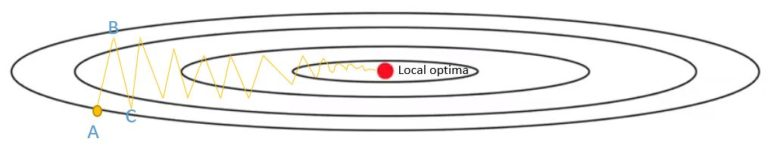

                            Cost function contour

We start gradient descent from point ‘A’ and after one iteration of gradient descent we may end up at point ‘B’, the other side of the ellipse. Then another step of gradient descent may end up at point ‘C’. With each iteration of gradient descent, we move towards the local optima with up and down oscillations. If we use larger learning rate then the vertical oscillation will have higher magnitude. So, this vertical oscillation slows down our gradient descent and prevents us from using a much larger learning rate.

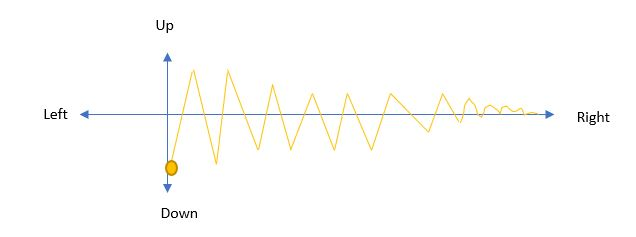

                            GD oscillations


The ’bias’ is responsible for the vertical oscillations whereas ‘weight’ defines the movement in the horizontal direction. If we slow down the update for ‘bias’ then we can damp out the vertical oscillations and if we update ‘weights’ with higher values then we can still move fast towards the local optima.

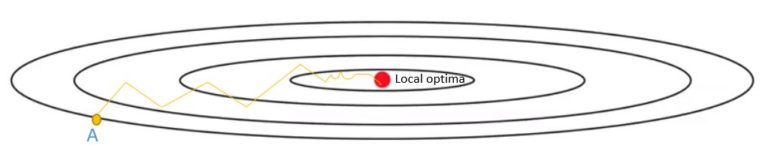

                            Gradient Descent with Momentum Contour

### How to Implement?

During backward propagation, we use dW and db to update our parameters W and b as follows:

        W = W – learning rate * dW

        b = b – learning rate * db

In RMSprop, instead of using dW and db independently for each epoch, we take the exponentially weighted averages of the square of dW and db.

        SdW = β * SdW + (1 – β) * dW2

        Sdb = β * Sdb + (1 – β) * db2

Where beta ‘β’ is another hyperparameter and takes values from 0 to 1. It sets the weight between the average of previous values and the square of current value to calculate the new weighted average.

After calculating exponentially weighted averages, we will update our parameters.

        W = W – learning rate *dW / sqrt(SdW)

        b = b – learning rate * db / sqrt(Sdb)

SdW is relatively small so that here we’re dividing dW by relatively small number whereas Sdb is relatively large so that here we’re dividing db with a relatively larger number to slow down the updates on a vertical dimension.

### Implementation in keras

RMSprop can be easily implemented in keras as:
    
    rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
	model.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

So lets see the effect of RMSprop on our baseline model:)

In [9]:
classifier = Sequential()
classifier.add(Dropout(0.2, input_shape=(11,)))
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
classifier.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, verbose=0, epochs=100)
score = classifier.evaluate(X_test,y_test)
print("RMSprop:" )
print(score[1])

2000/2000 [==============================] - 0s 55us/step
RMSprop:
0.8585


## Adam

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

### How Does Adam Work?
Adam is different to classical stochastic gradient descent.

Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.

A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds.

The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.

Adam is usually described as combining the advantages of two other extensions of stochastic gradient descent. Specifically:

Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).
Adam realizes the benefits of both AdaGrad and RMSProp.

Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).

Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the 
parameters beta1 and beta2 control the decay rates of these moving averages.

The update equations are as follows:

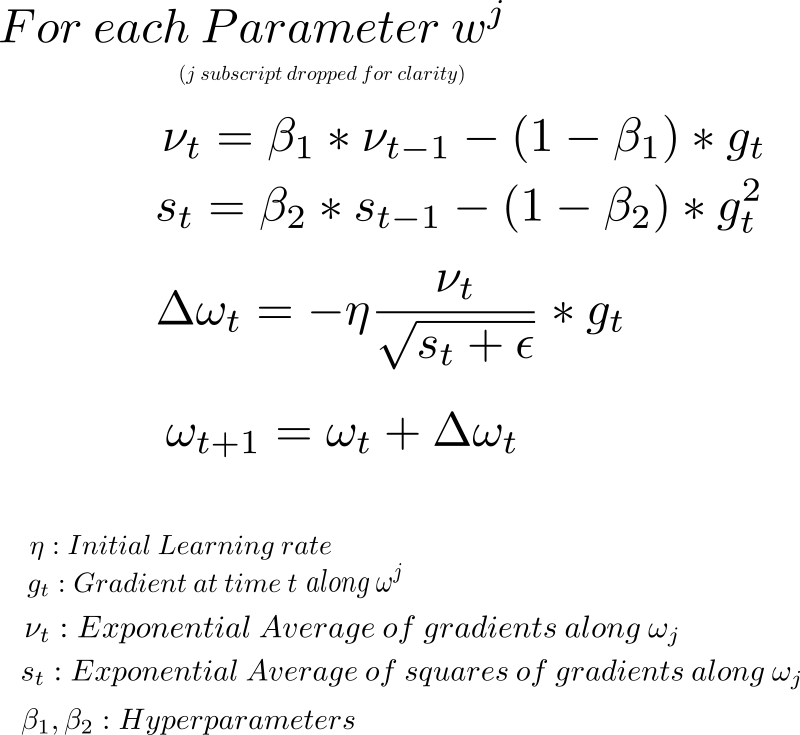

Here, we compute the exponential average of the gradient as well as the squares of the gradient for each parameters (Eq 1, and Eq 2). To decide our learning step, we multiply our learning rate by average of the gradient (as was the case with momentum) and divide it by the root mean square of the exponential average of square of gradients (as was the case with momentum) in equation 3. Then, we add the update.


The initial value of the moving averages and beta1 and beta2 values close to 1.0 (recommended) result in a bias of moment estimates towards zero. This bias is overcome by first calculating the biased estimates before then calculating bias-corrected estimates.


### Adam is Effective
Adam is a popular algorithm in the field of deep learning because it achieves good results fast.

Empirical results demonstrate that Adam works well in practice and compares favorably to other stochastic optimization methods.

### Adam Configuration Parameters
- alpha:
    Also referred to as the learning rate or step size. The proportion that weights are updated (e.g. 0.001). Larger values (e.g. 0.3) results in faster initial learning before the rate is updated. Smaller values (e.g. 1.0E-5) slow learning right down during training
- beta1: 
    The exponential decay rate for the first moment estimates (e.g. 0.9).
- beta2: 
    The exponential decay rate for the second-moment estimates (e.g. 0.999). This value should be set close to 1.0 on problems with a sparse gradient (e.g. NLP and computer vision problems).
- epsilon: 
    Is a very small number to prevent any division by zero in the implementation (e.g. 10E-8).


Further, learning rate decay can also be used with Adam. 

Good default settings for the general problems are alpha=0.001, beta1=0.9, beta2=0.999 and epsilon=10−8

The default values used by keras are

    Keras: lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0

### Implementation in keras

For including adam in your model, we can use the library function for adam optimizer and include it while compiling the model.
for e.g.

        adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

        model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'] )


In [ ]:
classifier = Sequential()
classifier.add(Dropout(0.2, input_shape=(11,)))
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, verbose=0, epochs=100)
score = classifier.evaluate(X_test,y_test)
print("Adam:" )
print(score[1])

### Conclusion
In this chapter, we have seen methods to build upon gradient descent to combat the problem of pathological curvature, and speed up search at the same time. These methods are often called "Adaptive Methods" since the learning step is adapted according to the topology of the contour.

Out of the three methods discussed, you may find momentum to be the most prevalent, despite Adam looking the most promising on paper. Empirical results have shown that all these algorithms can converge to different optimal local minima given the same loss. However, SGD with momentum seems to find more flatter minima than Adam, while adaptive methods tend to converge quickly towards sharper minima. Flatter minima generalize better than sharper ones.

Despite the fact that adaptive methods help us tame the unruly contours of a loss function of a deep net's loss function, they are not enough, especially with networks becoming deeper and deeper everyday. Along with choosing better optimization methods, considerable research is being put in coming up with architectures that produce smoother loss functions to start with. Batch Normalization and Residual Connections are a part of that effort.

And we also saw the improvements made by these optimizations method to our model.


# Chapter 6: Batch Normalization and its usage

## Why do we use batch normalization?
We normalize the input layer by adjusting and scaling the activations. For example, when we have features from 0 to 1 and some from 1 to 1000, we should normalize them to speed up learning. If the input layer is benefiting from it, why not do the same thing also for the values in the hidden layers, that are changing all the time, and get 10 times or more improvement in the training speed.

Batch normalization reduces the amount by what the hidden unit values shift around (covariance shift). To explain covariance shift, let’s have a deep network on cat detection. We train our data on only black cats’ images. So, if we now try to apply this network to data with colored cats, it is obvious; we’re not going to do well. The training set and the prediction set are both cats’ images but they differ a little bit. In other words, if an algorithm learned some X to Y mapping, and if the distribution of X changes, then we might need to retrain the learning algorithm by trying to align the distribution of X with the distribution of Y. 
Also, batch normalization allows each layer of a network to learn by itself a little bit more independently of other layers.


-We can use higher learning rates because batch normalization makes sure that there’s no activation that’s gone really high or really low. And by that, things that previously couldn’t get to train, it will start to train.
-It reduces overfitting because it has a slight regularization effects. Similar to dropout, it adds some noise to each hidden layer’s activations. Therefore, if we use batch normalization, we will use less dropout, which is a good thing because we are not going to lose a lot of information. However, we should not depend only on batch normalization for regularization; we should better use it together with dropout.

## How does batch normalization work?
To increase the stability of a neural network, batch normalization normalizes the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation.

However, after this shift/scale of activation outputs by some randomly initialized parameters, the weights in the next layer are no longer optimal. SGD ( Stochastic gradient descent) undoes this normalization if it’s a way for it to minimize the loss function.

Consequently, batch normalization adds two trainable parameters to each layer, so the normalized output is multiplied by a “standard deviation” parameter (gamma) and add a “mean” parameter (beta). In other words, batch normalization lets SGD do the denormalization by changing only these two weights for each activation, instead of losing the stability of the network by changing all the weights.

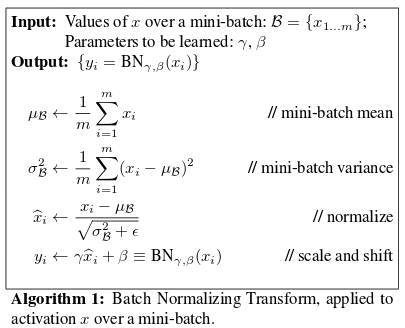




## Feedback:

* Everything is copied from this blog
https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c

# Chapter 7:Choice of Activation function and Loss function

## Transfer functions Overview
The transfer function, or activation function as it is more commonly called, as discussed earlier is a monotonically increasing, continuous, differentiable function, applied to the weighted input of a neuron to produce the final output.

Historically, a sigmoid function was used to mimic the observed behaviour of real neurons. Later it was discovered, that this leads to the problem of vanishing gradients in deep neural networks. For this reason, the most widely used activation function today is the rectifier, which is the identity function for all values greater than or equal to 0 and 0 for all negative values.

The activation function is central to the idea of neural networks for two reasons:
-First, if there were no activation functions, the whole neural network could be reduced to a group of linear function of the network input - one linear function for each output neuron. So, without activation functions, a neural network could not learn non-linear relationships.
-Second, each neuron can be seen as recognising a certain feature, with an activation of 0 indicating the absence of that feature. A negative value can't be interpreted in this framework (e.g. if the feature is, say, a round shape, then a positive value indicates the strength with which the network believes that there is a round shape and a value of 0 means, that there is no round shape. Obviously, there can't be less than no round shape.)

<img src="images/activationfunction.PNG"/>


### Why do we need activation functions?
If we do not apply a Activation function then the output signal would simply be a simple linear function.A linear function is just a polynomial of one degree. Now, a linear equation is easy to solve but they are limited in their complexity and have less power to learn complex functional mappings from data. A Neural Network without Activation function would simply be a Linear regression Model, which has limited power and does not performs good most of the times. We want our Neural Network to not just learn and compute a linear function but something more complicated than that. Also without activation function our Neural network would not be able to learn and model other complicated kinds of data such as images, videos , audio , speech etc. That is why we use Artificial Neural network techniques such as Deep learning to make sense of something complicated ,high dimensional,non-linear -big datasets, where the model has lots and lots of hidden layers in between and has a very complicated architecture which helps us to make sense and extract knowledge form such complicated big datasets.

### Why Non-Linearities?
Non-linear functions are those which have degree more than one and they have a curvature when we plot a Non-Linear function. Now we need a Neural Network Model to learn and represent almost anything and any arbitrary complex function which maps inputs to outputs. Neural-Networks are considered Universal Function Approximators. It means that they can compute and learn any function at all. Almost any process we can think of can be represented as a functional computation in Neural Networks.

Hence it all comes down to this, we need to apply a Activation function f(x) so as to make the network more powerfull and add ability to it to learn something complex and complicated form data and represent non-linear complex arbitrary functional mappings between inputs and outputs. Hence using a non linear Activation we are able to generate non-linear mappings from inputs to outputs.

Also another important feature of a Activation function is that it should be differentiable. We need it to be this way so as to perform backpropogation optimization strategy while propogating backwards in the network to compute gradients of Error(loss) with respect to Weights and then accordingly optimize weights using Gradient descend or any other Optimization technique to reduce Error.

An overly simplified thumb rule can be:

“Input times weights , add Bias and Activate”
### Most popular types of Activation functions -
Sigmoid or Logistic
Tanh — Hyperbolic tangent
ReLu -Rectified linear units
### Sigmoid Activation function: 
It is a activation function of form f(x) = 1 / 1 + exp(-x) . Its Range is between 0 and 1. It is a S — shaped curve. It is easy to understand and apply but it has major reasons which have made it fall out of popularity -

-Vanishing gradient problem
-Secondly , its output isn’t zero centered. It makes the gradient updates go too far in different directions. 0 < output < 1, and it makes optimization harder.
-Sigmoids saturate and kill gradients.
-Sigmoids have slow convergence.

<img src="images/sigmoidfunciton.png"/>
Now how do we solve the above problems ?


### Hyperbolic Tangent function- Tanh :
It’s mathamatical formula is f(x) = 1 — exp(-2x) / 1 + exp(-2x). Now it’s output is zero centered because its range in between -1 to 1 i.e -1 < output < 1 . Hence optimization is easier in this method hence in practice it is always preferred over Sigmoid function . But still it suffers from Vanishing gradient problem.

![tanh.png](attachment:tanh.png)
<img src="images/tanh.png"/>
Then how do we deal and rectify the vanishing gradient problem ?

### ReLu- Rectified Linear units :
It has become very popular in the past couple of years. It was recently proved that it had 6 times improvement in convergence from Tanh function. It’s just R(x) = max(0,x) i.e if x < 0 , R(x) = 0 and if x >= 0 , R(x) = x. Hence as seeing the mathamatical form of this function we can see that it is very simple and efficinent . A lot of times in Machine learning and computer science we notice that most simple and consistent techniques and methods are only preferred and are best. Hence it avoids and rectifies vanishing gradient problem . Almost all deep learning Models use ReLu nowadays.

But its limitation is that it should only be used within Hidden layers of a Neural Network Model.

Hence for output layers we should use a Softmax function for a Classification problem to compute the probabilites for the classes , and for a regression problem it should simply use a linear function.

Another problem with ReLu is that some gradients can be fragile during training and can die. It can cause a weight update which will makes it never activate on any data point again. Simply saying that ReLu could result in Dead Neurons.

To fix this problem another modification was introduced called Leaky ReLu to fix the problem of dying neurons. It introduces a small slope to keep the updates alive.

We then have another variant made form both ReLu and Leaky ReLu called Maxout function .

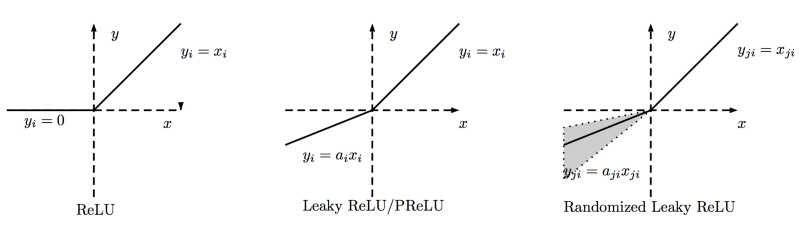

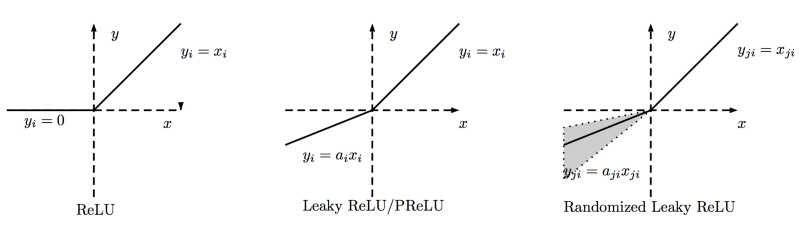

### Conclusion
The question was which one is better to use ?

Answer to this question is that nowadays we should use ReLu which should only be applied to the hidden layers. And if your model suffers form dead neurons during training we should use leaky ReLu or Maxout function.

It’s just that Sigmoid and Tanh should not be used nowadays due to the vanishing Gradient Problem which causes a lots of problems to train,degrades the accuracy and performance of a deep Neural Network Model.

#### Usage in keras
The activation function can be specified for each layer definition:

for e.g.
model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))

The activation function needs to be specified as activation = 'function_name'

function_name for
- Sigmoid : 'sigmoid'
- Relu : 'relu'
- Hyperbolic tangent : 'tanh' 



## Loss functions Overview

Loss functions are a key part of any machine learning model: they define an objective against which the performance of your model is measured, and the setting of weight parameters learned by the model is determined by minimizing a chosen loss function. There are several different common loss functions to choose from: the cross-entropy loss, the mean-squared error, the huber loss, and the hinge loss - just to name a few. Given a particular model, each loss function has particular properties that make it interesting.

### Mean-Squared Error
Mean Squared Error (MSE), or quadratic, loss function is widely used in linear regression as the performance measure, and the method of minimizing MSE is called Ordinary Least Squares (OSL), the basic principle of OSL is that the optimized fitting line should be a line which minimizes the sum of distance of each point to the regression line, i.e., minimizes the quadratic sum. The standard form of MSE loss function is defined as

\begin{align*}
\boldsymbol{\mathcal{L}}= \frac{1}{N}\sum_{i=1}^{N}(y_i - \theta^Tx_i)^2
\end{align*}

, where $ (y^{(i)}-\hat{y}^{(i)}) $ is named as residual, and the target of MSE loss function is to minimize the residual sum of squares. If using Sigmoid as the activation function, the quadratic loss function would suffer the problem of slow convergence (learning speed), for other activation funtions, it would not have such problem.

For example, by using Sigmoid, 
\begin{align*}
\hat{y}^{(i)}=\sigma(\mathbf{z}^{(i)})=\sigma(\boldsymbol{\theta}^{T}\mathbf{x}^{(i)})
\end{align*}
, simply, we only consider one sample, say, $ (y-\sigma(\mathbf{z}))^{2} $, and it derivative is computed by
\begin{align*}
\frac{\partial\boldsymbol{\mathcal{L}}}{\partial\boldsymbol{\theta}}=-(y-\sigma(\mathbf{z}))\cdot\sigma’(\mathbf{z})\cdot\mathbf{x}
\end{align*}

according to the shape and feature of Sigmoid, when σ(z) tends to 0 or 1,σ′(z) is close to zero, and when σ(z) close to 0.5, σ′(z) will reach it maximum. In this case, when the difference between predicted value and true label (y−σ(z)) is large, σ′(z) will close to 0, which decreases the convergence speed, this is improper, since we expect that the learning speed should be fast when the error is large.

#### Usage in keras
The loss function can be specified when the model is being compiled.
	
For mean squared error:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [12]:
classifier = Sequential()
classifier.add(Dropout(0.2, input_shape=(11,)))
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
classifier.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, verbose=0, epochs=100)
score = classifier.evaluate(X_test,y_test)
print("Mean Squared Error:" )
print(score[1])

2000/2000 [==============================] - 0s 61us/step
Mean Squared Error:
0.8665


### Cross entropy Loss
Cross Entropy is commonly-used in binary classification (labels are assumed to take values 0 or 1) as a loss function (For multi-classification, we use Multi-class Cross Entropy), which is computed by
\begin{align*}
\boldsymbol{\mathcal{L}}=-\sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \log(h_{\theta}(x_{i}){_j})
\end{align*}
\\
For binary classification the function is:
\begin{align}
\boldsymbol{\mathcal{L}}=-\frac{1}{n}\sum_{i=1}^{n}\big[y^{(i)}\log(\hat{y}^{(i)})+(1-y^{(i)})\log(1-\hat{y}^{(i)})\big]
\end{align}

Cross entropy measures the divergence between two probability distribution, if the cross entropy is large, which means that the difference between two distribution is large, while if the cross entropy is small, which means that two distribution is similar to each other. As we have mentioned in MSE that it suffers slow divergence when using Sigmoid as activation function, here the cross entropy does not have such problem. Samely, 
\begin{align}
\hat{y}^{(i)}=\sigma(\mathbf{z}^{(i)})=\sigma(\boldsymbol{\theta}^{T}\mathbf{x}^{(i)})
\end{align}
, and we only consider one training sample, by using Sigmoid, we have 
\begin{align}
\boldsymbol{\mathcal{L}}=y\log(\sigma(\mathbf{z}))+(1-y)\log(1-\sigma(\mathbf{z}))
\end{align}
, and compute it derivative as
\begin{align}
\frac{\partial\boldsymbol{\mathcal{L}}}{\partial\boldsymbol{\theta}}=(y-\sigma(\mathbf{z}))\cdot\mathbf{x}
\end{align}

compare to the derivative in MSE, it eliminates the term σ′(z), where the learning speed is only controlled by (y−σ(z)). In this case, when the difference between predicted value and actual value is large, the learning speed, i.e., convergence speed, is fast, otherwise, the difference is small, the learning speed is small, this is our expectation. Generally, comparing to quadratic cost function, cross entropy cost function has the advantages that fast convergence and is more likely to reach the global optimization (like the momentum, it increases the update step).

#### Usage in keras
The loss function can be specified when the model is being compiled.

For binary cross entropy :
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [11]:
classifier = Sequential()
classifier.add(Dropout(0.2, input_shape=(11,)))
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
classifier.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, verbose=0, epochs=100)
score = classifier.evaluate(X_test,y_test)
print("Cross Entropy Loss:" )
print(score[1])

2000/2000 [==============================] - 0s 61us/step
Cross Entropy Loss:
0.863


# Chapter 8:  Text specific optimizations

In this unit we discuss optimization techniques specific to text based neural networks.

Rather than pre-defining or using off-the-shelf hyperparameters, simply tuning the hyperparameters of a deep learning model can yield significant improvements over baselines. Recent advances in Bayesian Optimization have made it an ideal tool for the black-box optimization of hyperparameters in neural networks and far more efficient than the widely used grid search. Automatic tuning of hyperparameters of an LSTM has led to state-of-the-art results in language modeling, outperforming models that are far more complex .

### LSTM tricks

#### Learning the initial state  
We generally initialize the initial LSTM states with a 0 vector. Instead of fixing the initial state, we can learn it like any other parameter, which can improve performance.


#### Tying input and output embeddings   
Input and output embeddings account for the largest number of parameters in the LSTM model. If the LSTM predicts words as in language modelling, input and output parameters can be shared. This is particularly useful on small datasets that do not allow to learn a large number of parameters.

#### Gradient norm clipping   
One way to decrease the risk of exploding gradients is to clip their maximum value . This, however, does not improve performance consistently . Rather than clipping each gradient independently, clipping the global norm of the gradient yields more significant improvements .

#### Down-projection   
To reduce the number of output parameters further, the hidden state of the LSTM can be projected to a smaller size. This is useful particularly for tasks with a large number of outputs, such as language modelling .




## Feedback:
* Flow of the concept :

    - Weight initialization variants
    - Regularization using Dropout, early stopping and other methods	
    - Choice of learning rate and learning rate decay
    - Transfer function - Relu vs Sigmoid - Cross entropy vs mse
    - Gradient descent with Momentum
    - Optimizations - RMSprop, Adam
    - Batch Normalization and its usage
    - Specific Text Optimizations